# Введение

В качестве предметной области был выбран набор данных, содержащий данные об качестве цемнта.

Задача данной работы - предсказание качества цемента на основе нескольких факторов. Данная задача может быть актуальна для строительных компаний, для улучшения прочности составов.

## Основная часть

### Поставновка задачи

Необходимо решить задачу регрессии по прогнозированию прочности цемента с использованием материалов дисциплины «Технологии машинного обучения».

## Набор данных для построения моделей машинного обучения

### Текстовое описание

Данный набор доступен по адресу: https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networking

Набор данных имеет следуующие атрибуты


  - **Cement (Цемент):** Количество цемента в килограммах на кубический метр (kg/m³). Цемент является основным вяжущим материалом в бетонной смеси.
  
  - **Blast Furnace Slag (Шлак доменной печи):**  Количество шлака доменной печи в килограммах на кубический метр (kg/m³). Шлак является побочным продуктом при производстве чугуна, который может использоваться как добавка в цемент.
  
  - **Fly Ash (Зола-унос):** Количество золы-уноса в килограммах на кубический метр (kg/m³). Зола-унос – это побочный продукт сжигания угля на электростанциях, также используемый как добавка в цемент.
  
  - **Water (Вода):** Количество воды в килограммах на кубический метр (kg/m³). Вода необходима для гидратации цемента и образования цементного теста.

  - **Super-plasticizer (Суперпластификатор):** Количество суперпластификатора в килограммах на кубический метр (kg/m³). Суперпластификаторы – это химические добавки, которые улучшают текучесть бетонной смеси без изменения водоцементного соотношения.
  
  - **Coarse Aggregate (Крупный заполнитель):** Количество крупного заполнителя в килограммах на кубический метр (kg/m³). Крупный заполнитель, как правило, это гравий или щебень, который составляет основную часть бетона.
  
  
  - **Fine Aggregate (Мелкий заполнитель):** Количество мелкого заполнителя в килограммах на кубический метр (kg/m³). Мелкий заполнитель, обычно это песок, заполняет пустоты между крупными заполнителями.
  
  
  - **Age (Возраст):** Возраст бетона в днях (дни) с момента его заливки. Возраст бетона влияет на его прочностные характеристики, так как прочность бетона со временем увеличивается.

In [85]:
!unzip "archive*.zip"

Archive:  archive(2).zip
  inflating: concrete_data.csv       


### Импортируем библиотеки

In [86]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [87]:
data = pd.read_csv('concrete_data.csv')

In [88]:
data.columns = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarse_agg', 'fine_agg', 'age', 'strength']

In [89]:
data.head()

,cement,slag,flyash,water,superplasticizer,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [90]:
data.shape

(1030, 9)

In [91]:
data.dtypes

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarse_agg          float64
fine_agg            float64
age                   int64
strength            float64
dtype: object

In [92]:
data.describe()

,cement,slag,flyash,water,superplasticizer,coarse_agg,fine_agg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Обработка пропусков

In [93]:
data.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarse_agg          0
fine_agg            0
age                 0
strength            0
dtype: int64

Проверим распределение данных

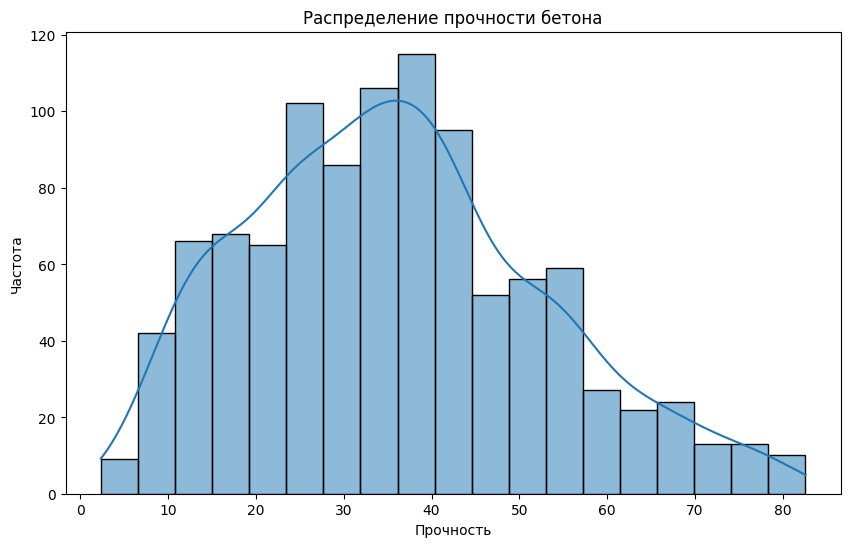

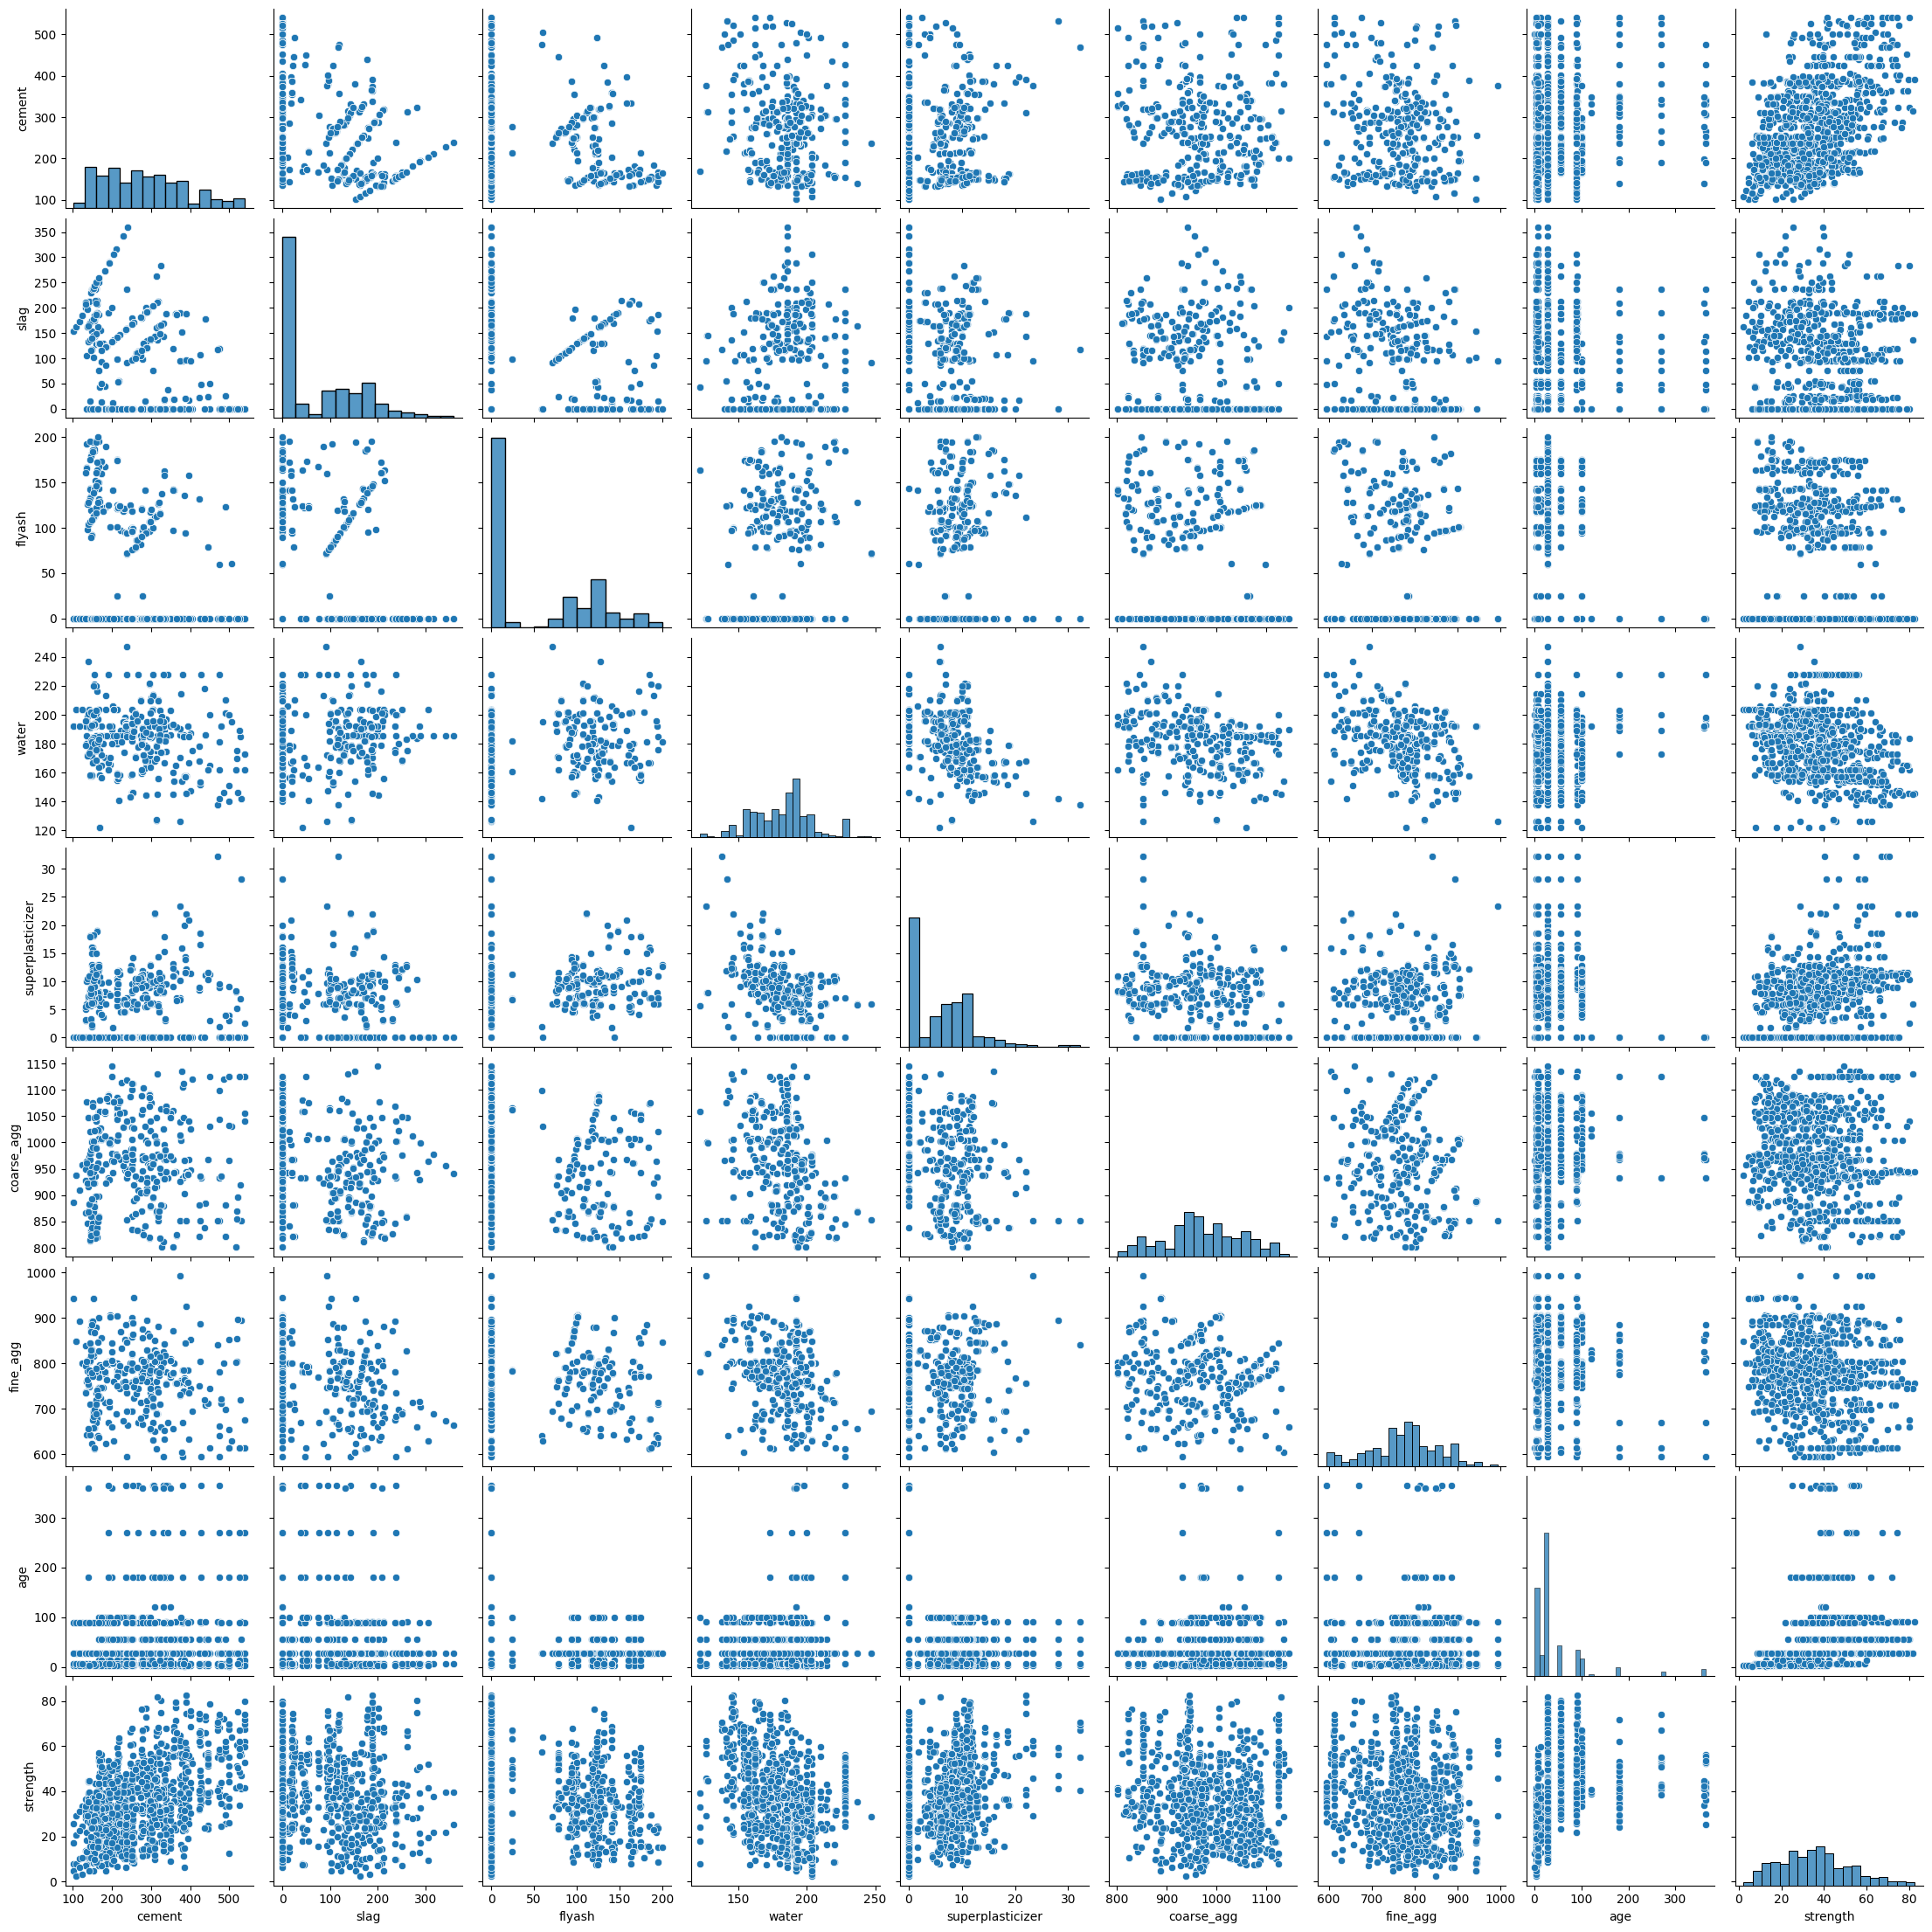

In [94]:
# Распределение целевой переменной (strength)
plt.figure(figsize=(10, 6))
sns.histplot(data['strength'], kde=True)
plt.title('Распределение прочности бетона')
plt.xlabel('Прочность')
plt.ylabel('Частота')
plt.show()

# Парные графики
sns.pairplot(data)
plt.show()

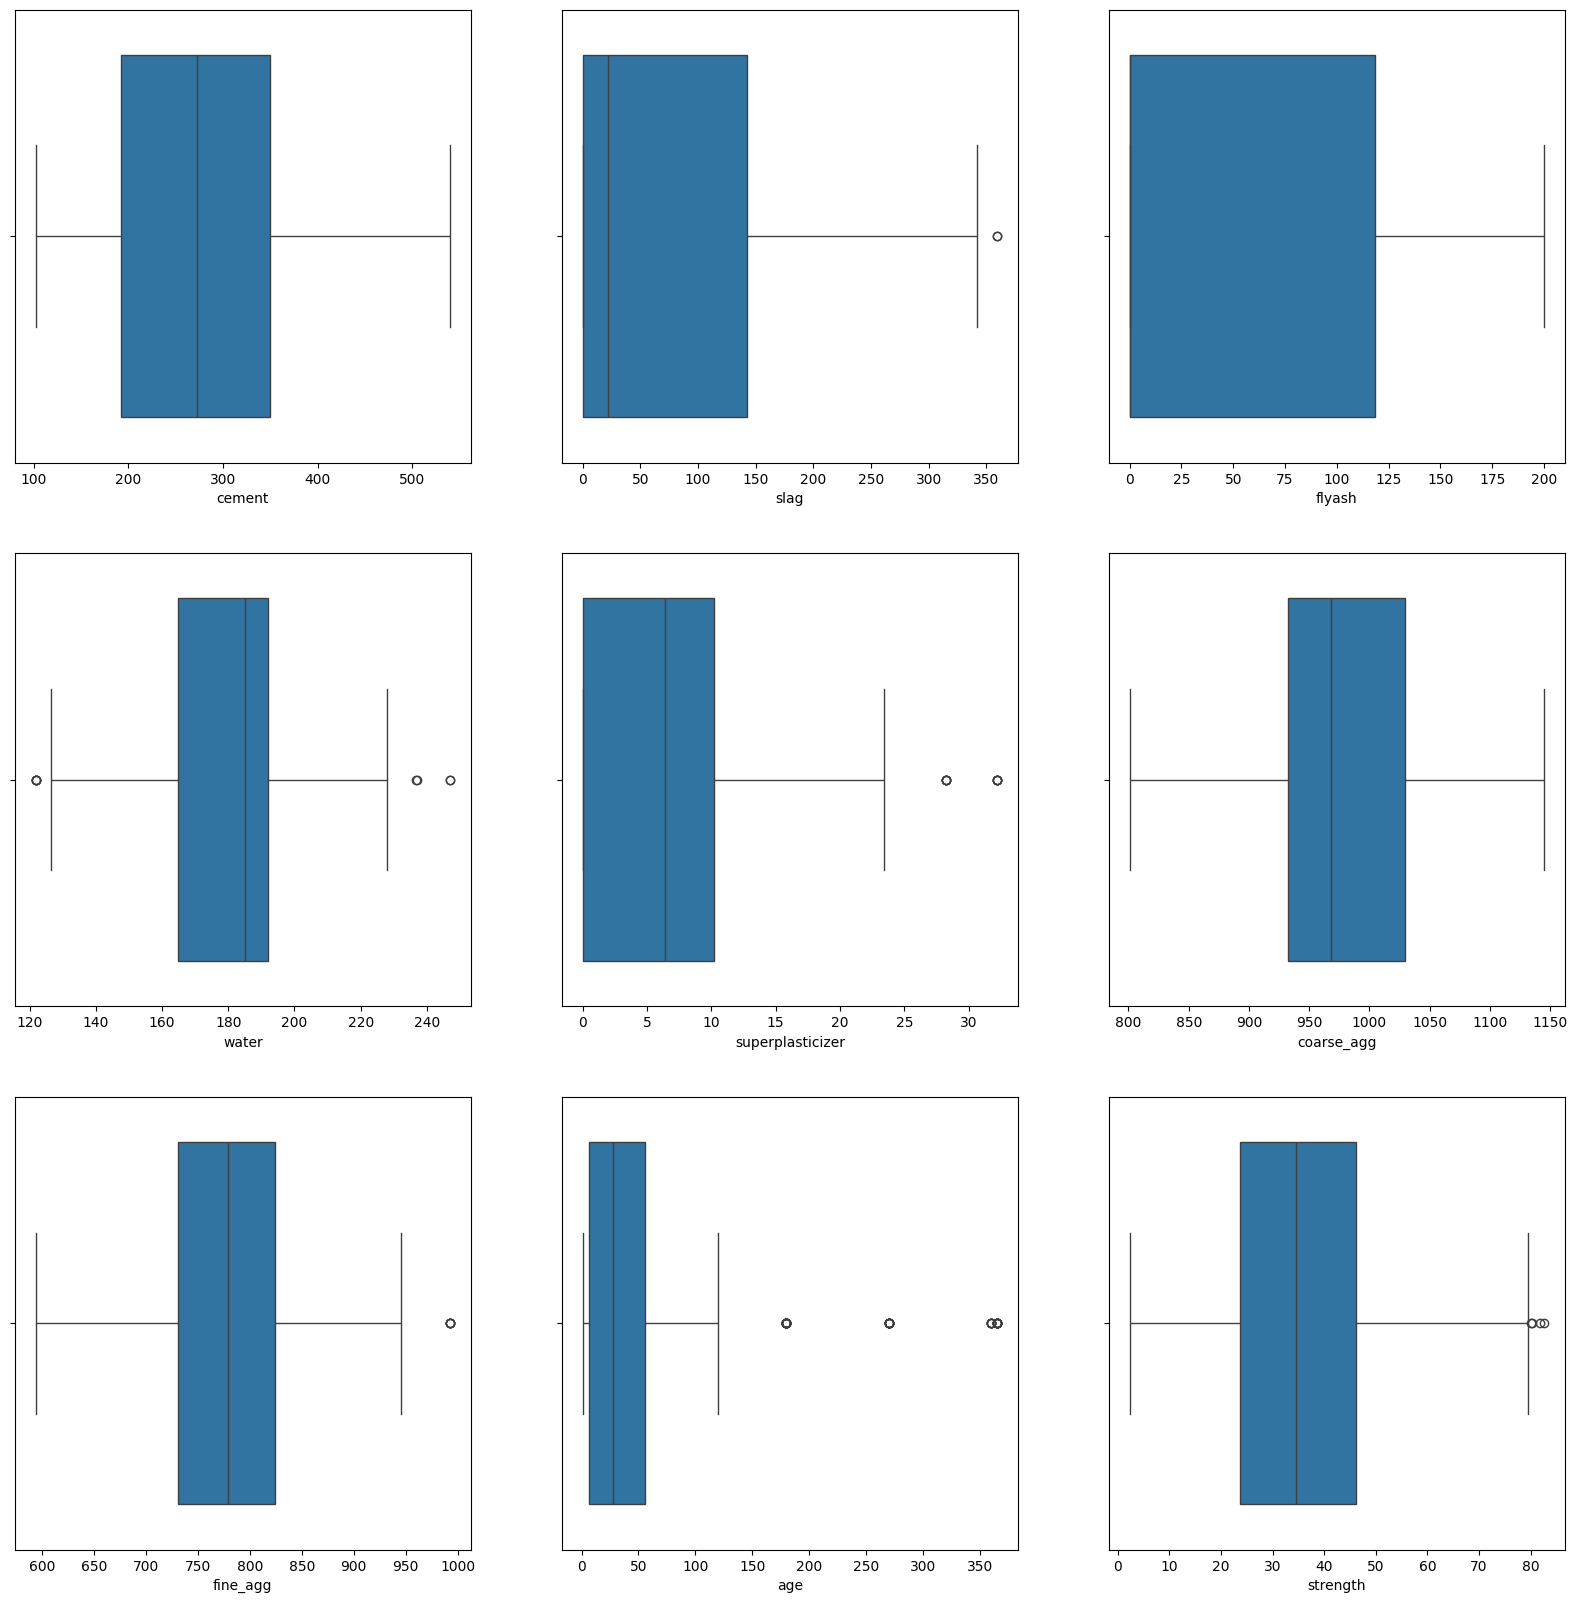

In [95]:
fig, axes = plt.subplots(3, 3, figsize = (20,20));
col_cnt = 0
col_names = data.columns.tolist()
for r in range(3):
    for c in range(3):
        try:
            sns.boxplot(data[col_names[col_cnt]], ax=axes[r][c], orient="h");
            col_cnt += 1
        except:
            pass

Есть несколько отклонений по шлаку, воде, суперпластификатору, fine_agg и возрасту.

При удалении строк с отклонениями удаляется около 10% данных, поэтому мы заменим их средними значениями.


In [96]:
outlier_cols = ["slag", "water", "superplasticizer", "fine_agg", "age"]
def cap_outliers(df, col):
    q1 = df.describe()[col].loc["25%"]
    q3 = df.describe()[col].loc["75%"]
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df.loc[df[col] < lower_bound, col] = df.describe()[col].loc["mean"]
    df.loc[df[col] > upper_bound, col] = df.describe()[col].loc["mean"]
    return df


for col in outlier_cols:
    df = cap_outliers(data, col)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(data, data.strength, random_state=1)

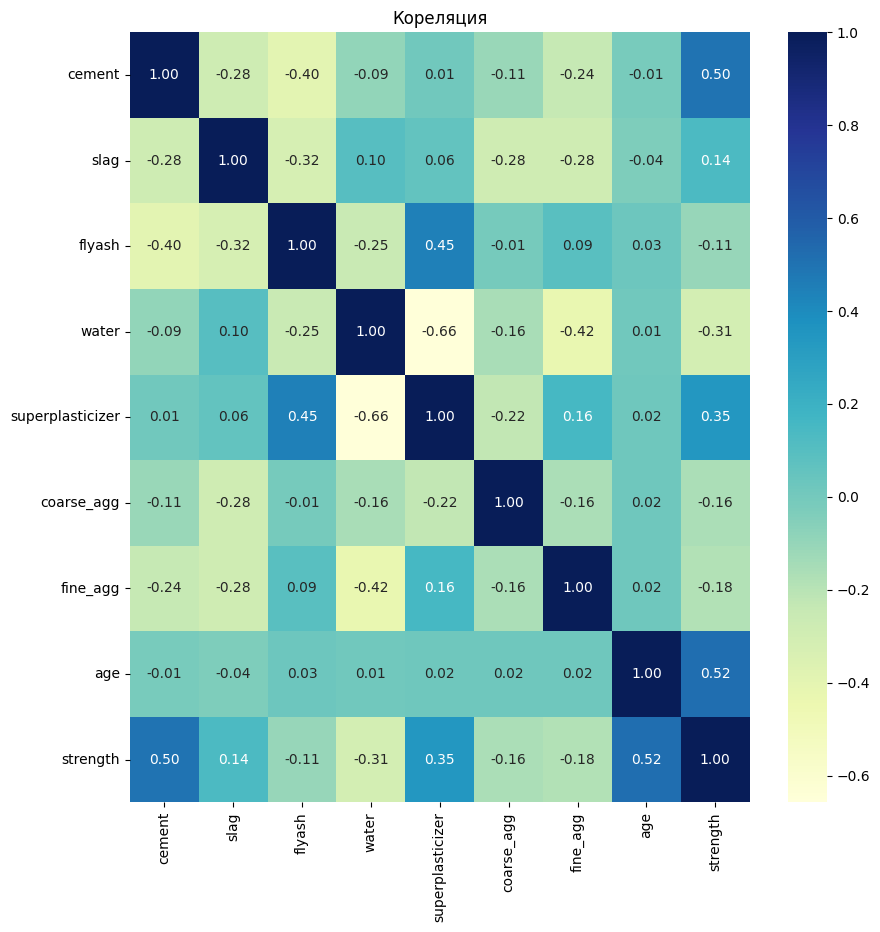

In [98]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data[data.columns].corr(), annot=True, fmt='.2f', cmap="YlGnBu")
ax.set_title('Кореляция')
plt.show()

## Масштабирование данных

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data.head()

,cement,slag,flyash,water,superplasticizer,coarse_agg,fine_agg,age,strength
0,2.477915,-0.859675,-0.847144,-0.953058,-0.634170,0.863154,-1.226963,-0.188562,2.645408
1,2.477915,-0.859675,-0.847144,-0.953058,-0.634170,1.056164,-1.226963,-0.188562,1.561421
2,0.491425,0.810645,-0.847144,2.252255,-1.090842,-0.526517,-2.269377,0.443630,0.266627
3,0.491425,0.810645,-0.847144,2.252255,-1.090842,-0.526517,-2.269377,0.443630,0.313340
4,-0.790459,0.692257,-0.847144,0.503903,-1.090842,0.070527,0.673536,0.443630,0.507979


### Разделение данных

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X = scaled_data.drop('strength', axis=1)
y = scaled_data['strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((824, 8), (824,), (206, 8), (206,))

## Построение базового решения (baseline) без подбора гиперпараметров

In [104]:
# Модели
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Метрики
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [116]:
models = {
    'Linear Regression': LinearRegression(),
    'KNN_20':KNeighborsRegressor(n_neighbors=20),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR()
}

,MSE,MAE,R2
Linear Regression,0.255050,0.395566,0.724031
KNN_20,0.294442,0.428937,0.681408
Decision Tree,0.172512,0.269761,0.813339
Random Forest,0.114684,0.232714,0.875910
Gradient Boosting,0.108035,0.249911,0.883104
SVR,0.128574,0.262250,0.860881


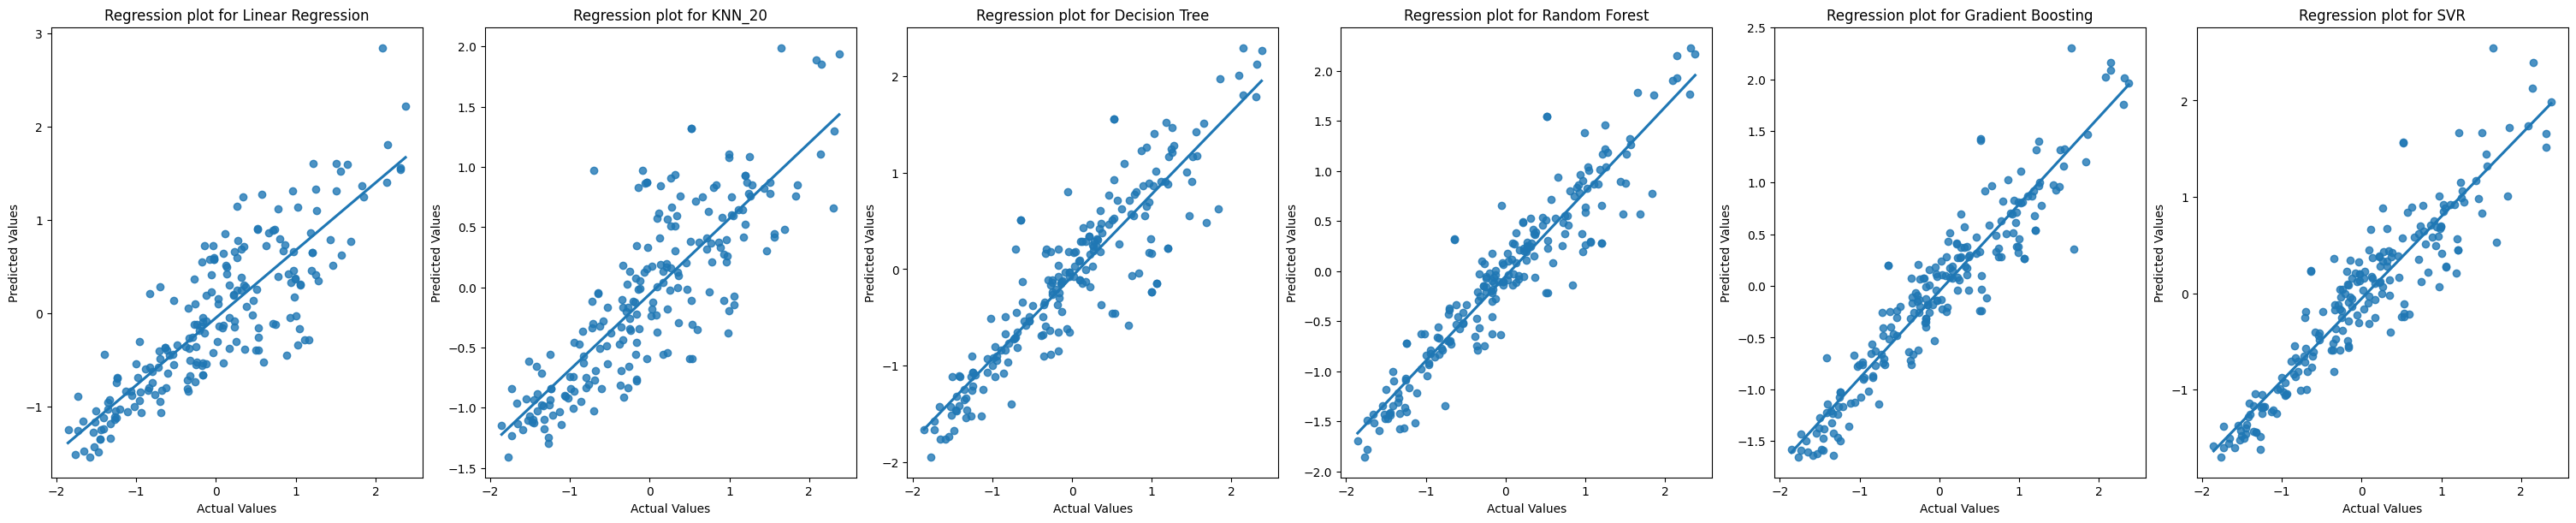

In [106]:
results = {}

fig, axes = plt.subplots(1, len(models), figsize=(5 * len(models), 6), constrained_layout=True)

for ax, (name, model) in zip(axes, models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

    sns.regplot(x=y_test, y=y_pred, ci=None, ax=ax)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'Regression plot for {name}')

# результаты
baseline_results = pd.DataFrame(results).T
baseline_results

## Подбор оптимальной модели и гиперпараметра

In [117]:
from sklearn.model_selection import GridSearchCV

### Пример подбора гиперпараметров для случайного леса

In [108]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [109]:
%%time
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

print("Лучшие гиперпараметры для случайного леса:", grid_search_rf.best_params_)

Лучшие гиперпараметры для случайного леса: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
CPU times: user 1min 12s, sys: 215 ms, total: 1min 12s
Wall time: 1min 13s


In [110]:
best_rf_model = grid_search_rf.best_estimator_
y_pred = best_rf_model.predict(X_test)

optimized_results_rf = {
    'Random Forest': {
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }
}

optimized_results_rf = pd.DataFrame(optimized_results_rf).T
optimized_results_rf

,MAE,MSE,R2
Random Forest,0.238349,0.116001,0.874485


### Пример подбора гиперпараметров для Случайных соседей

In [111]:
n_range = np.array(range(5,100,5))
knn_params = [{'n_neighbors': n_range}]
knn_params

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
         90, 95])}]

In [112]:
%%time
grid_search_knn = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, y_train)

print("Лучшие гиперпараметры для Случайных соседей:", grid_search_knn.best_params_)


Лучшие гиперпараметры для Случайных соседей: {'n_neighbors': 5}
CPU times: user 1.21 s, sys: 5.89 ms, total: 1.22 s
Wall time: 1.28 s


In [113]:
best_knn_model = grid_search_knn.best_estimator_
y_pred = best_knn_model.predict(X_test)

optimized_results_knn = {
    'KNN': {
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }
}

optimized_results_knn = pd.DataFrame(optimized_results_knn).T
optimized_results_knn

,MAE,MSE,R2
KNN,0.353144,0.212916,0.769621


## Выводы о качестве построенных моделей на основе выбранных метрик

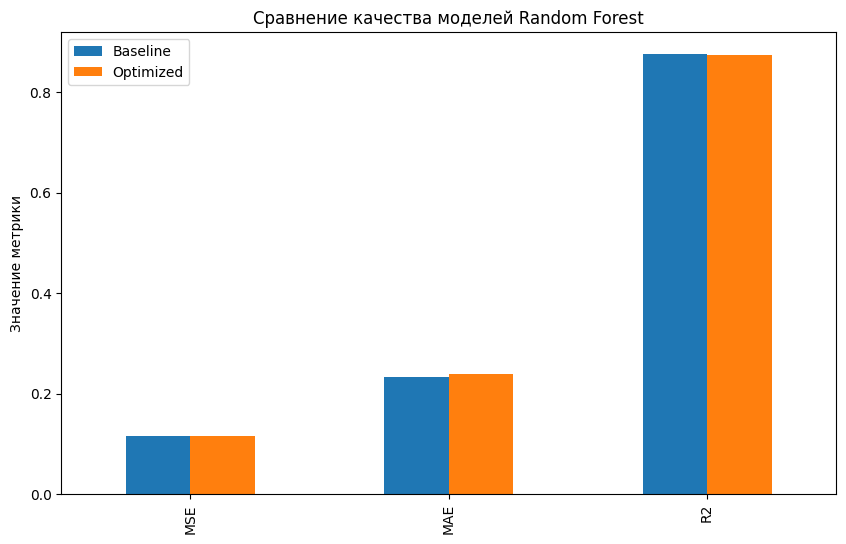

In [114]:
comparison = pd.concat([baseline_results.loc['Random Forest'], optimized_results_rf.loc['Random Forest']], axis=1)
comparison.columns = ['Baseline', 'Optimized']

comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Сравнение качества моделей Random Forest')
plt.ylabel('Значение метрики')
plt.show()

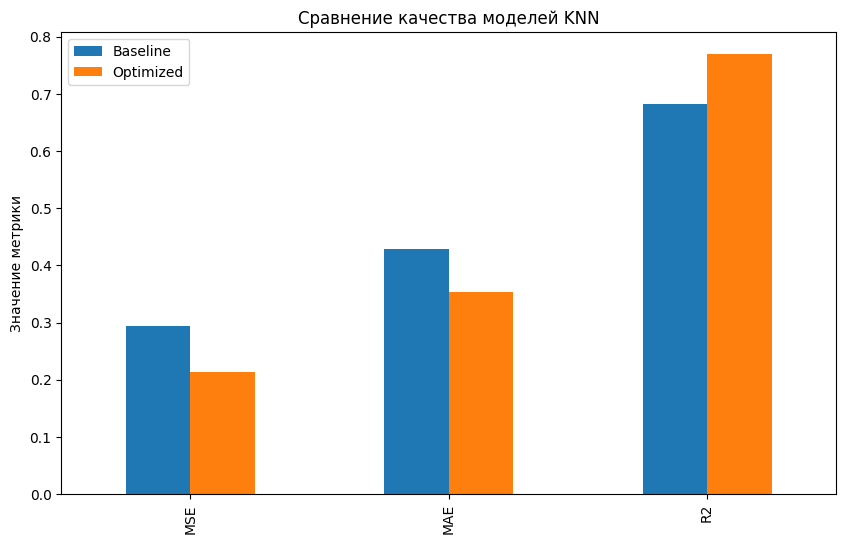

In [115]:
comparison = pd.concat([baseline_results.loc['KNN_20'], optimized_results_knn.loc['KNN']], axis=1)
comparison.columns = ['Baseline', 'Optimized']

comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Сравнение качества моделей KNN')
plt.ylabel('Значение метрики')
plt.show()

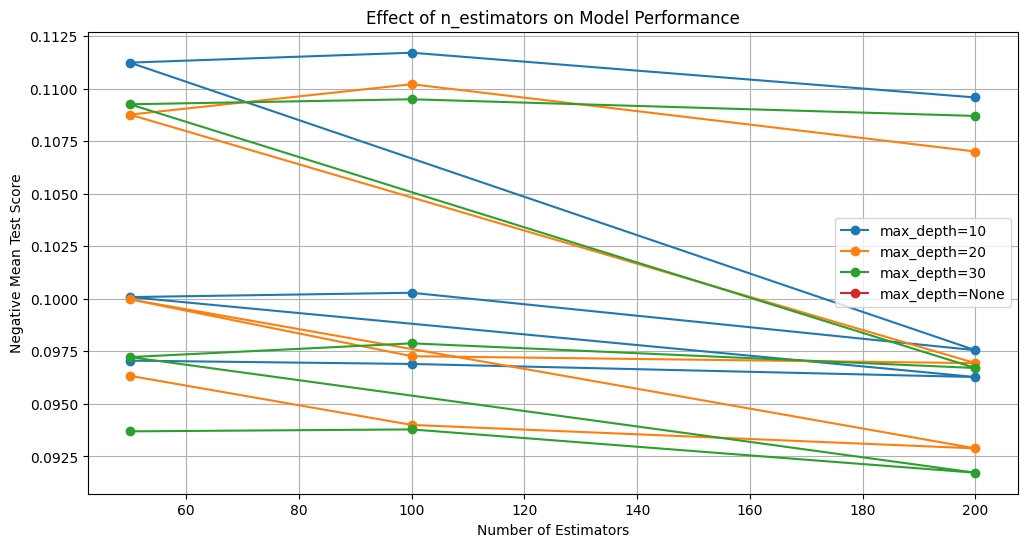

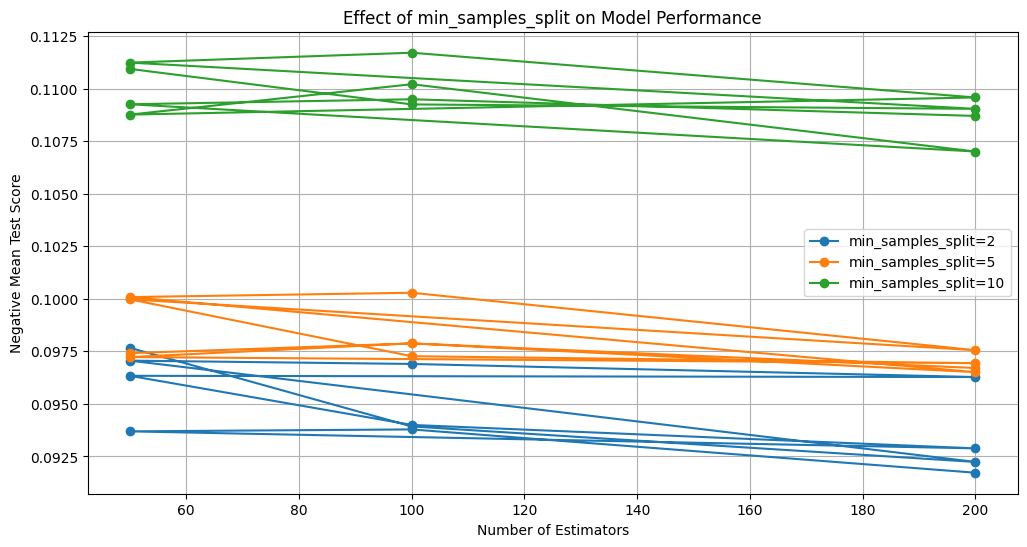

Лучшие гиперпараметры: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Лучший результат (MSE): 0.09172674070077816


In [122]:
# Результаты GridSearchCV
results = grid_search_knn.cv_results_

# Средние тестовые метрики
mean_test_scores = results['mean_test_score']

# Значения гиперпараметров
param_n_estimators = results['param_n_neghbours'].data
param_max_depth = results['param_max_depth'].data
param_min_samples_split = results['param_min_samples_split'].data

# Создание DataFrame для удобства анализа
df = pd.DataFrame({
    'n_estimators': param_n_estimators,
    'max_depth': param_max_depth,
    'min_samples_split': param_min_samples_split,
    'mean_test_score': mean_test_scores
})

# Визуализация влияния n_estimators на метрику
plt.figure(figsize=(12, 6))
for depth in [10, 20, 30, None]:
    subset = df[df['max_depth'] == depth]
    plt.plot(subset['n_estimators'], -subset['mean_test_score'], marker='o', label=f'max_depth={depth}')

plt.xlabel('Number of Estimators')
plt.ylabel('Negative Mean Test Score')
plt.title('Effect of n_estimators on Model Performance')
plt.legend()
plt.grid(True)
plt.show()

# Визуализация влияния min_samples_split на метрику
plt.figure(figsize=(12, 6))
for split in [2, 5, 10]:
    subset = df[df['min_samples_split'] == split]
    plt.plot(subset['n_estimators'], -subset['mean_test_score'], marker='o', label=f'min_samples_split={split}')

plt.xlabel('Number of Estimators')
plt.ylabel('Negative Mean Test Score')
plt.title('Effect of min_samples_split on Model Performance')
plt.legend()
plt.grid(True)
plt.show()

# Выводы
best_params = grid_search_rf.best_params_
best_score = -grid_search_rf.best_score_

print(f"Лучшие гиперпараметры: {best_params}")
print(f"Лучший результат (MSE): {best_score}")

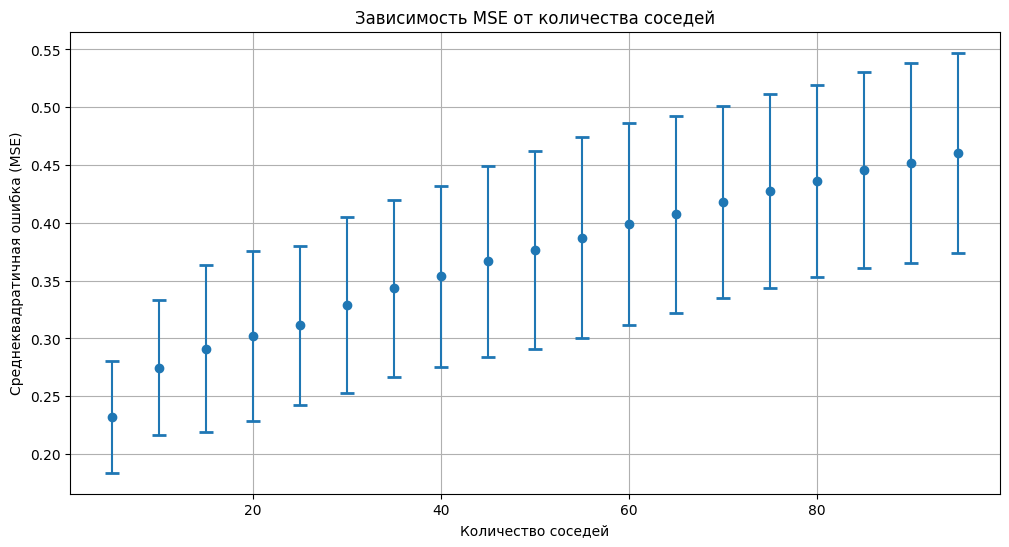

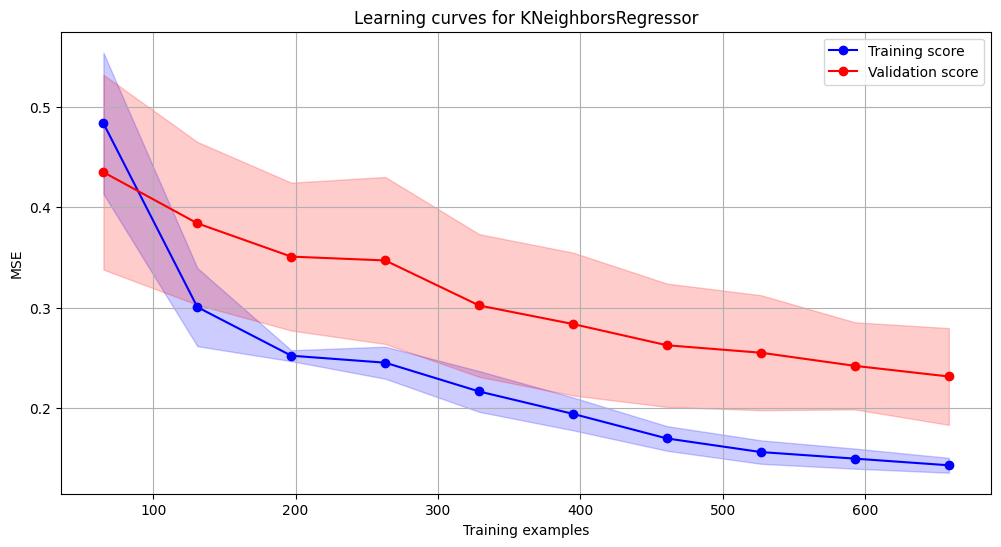

In [124]:
# Получение результатов поиска
results = grid_search_knn.cv_results_

# Построение графика влияния гиперпараметров на качество модели
mean_test_scores = results['mean_test_score']
std_test_scores = results['std_test_score']

plt.figure(figsize=(12, 6))
plt.errorbar(n_range, -mean_test_scores, yerr=std_test_scores, fmt='o', capsize=5, capthick=2)
plt.title('Зависимость MSE от количества соседей')
plt.xlabel('Количество соседей')
plt.ylabel('Среднеквадратичная ошибка (MSE)')
plt.grid(True)
plt.show()

# Построение графика обучения и валидации
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=KNeighborsRegressor(n_neighbors=grid_search_knn.best_params_['n_neighbors']),
    X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')

# Средние и стандартные отклонения для ошибок
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = -np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.2, color='red')
plt.title('Learning curves for KNeighborsRegressor')
plt.xlabel('Training examples')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.grid(True)
plt.show()
